# Sentiment Analysis of Customer Satisfaction in Commercial Aircrafts

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
cd C:\Users\suyas\OneDrive-stevens.edu\Desktop\Customer_Satisfaction\archive

C:\Users\suyas\OneDrive-stevens.edu\Desktop\Customer_Satisfaction\archive


In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Removing Redundant data from train.csv

df_train = df_train.drop('Unnamed: 0', axis=1)

df_train = df_train.drop('id', axis=1)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
# Removing Redundant Data from test.csv

df_test = df_test.drop('Unnamed: 0', axis=1)

df_test = df_test.drop('id', axis=1)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [11]:
# Remapping the data

df_train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

df_test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [12]:
df_train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

Satisfied and Dissatisfied Customers

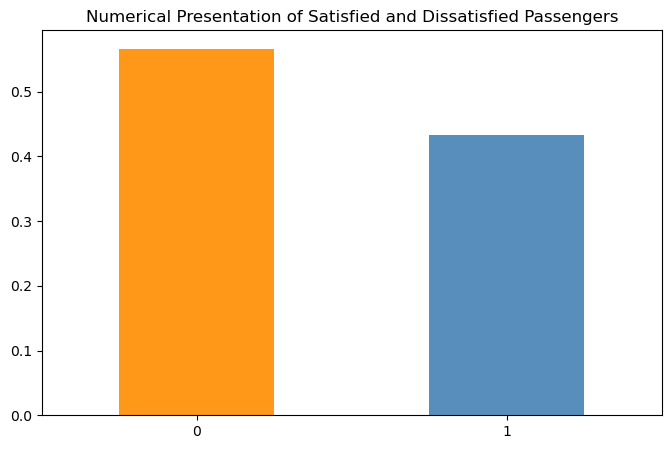

In [13]:
fig = plt.figure(figsize = (8,5))

df_train.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0, color= ['darkorange','steelblue'])

plt.title('Numerical Presentation of Satisfied and Dissatisfied Passengers')

plt.show()

In [14]:
# Null values in Both Dataset and replacing with mean feature

df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [15]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [16]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())

df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

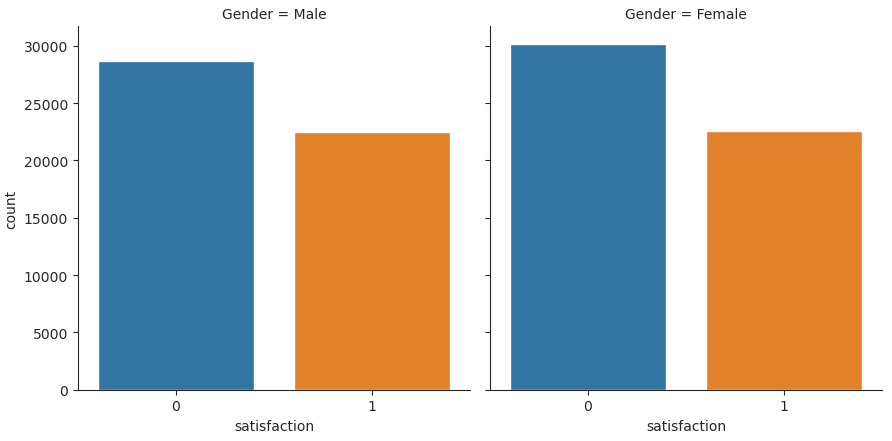

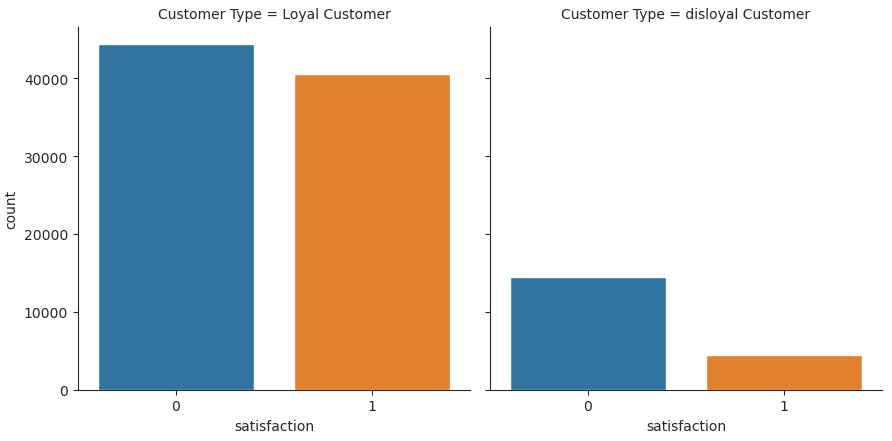

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)

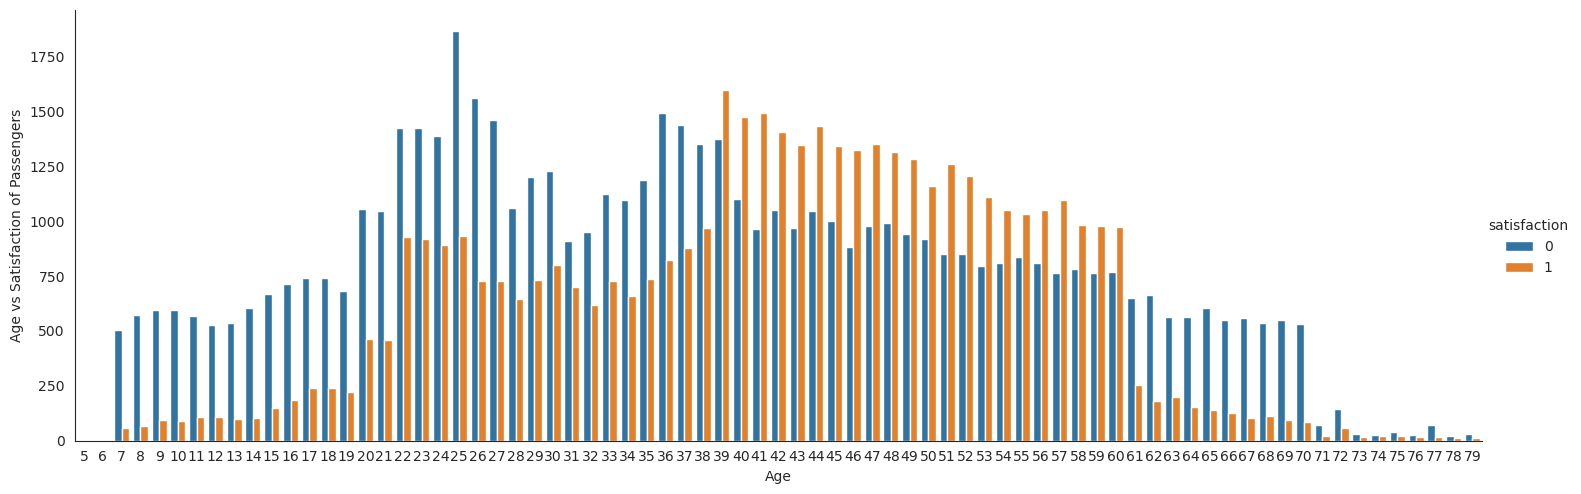

In [18]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df_train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Satisfaction of Passengers')

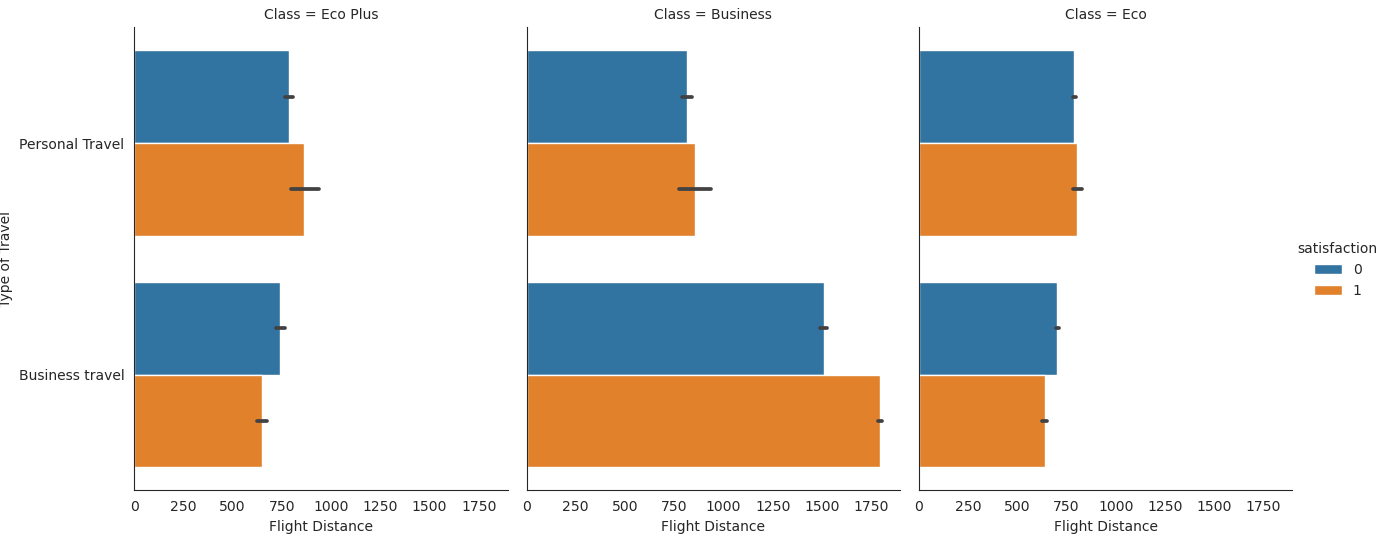

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df_train, kind="bar", 
                    height=5.5, aspect=.8)

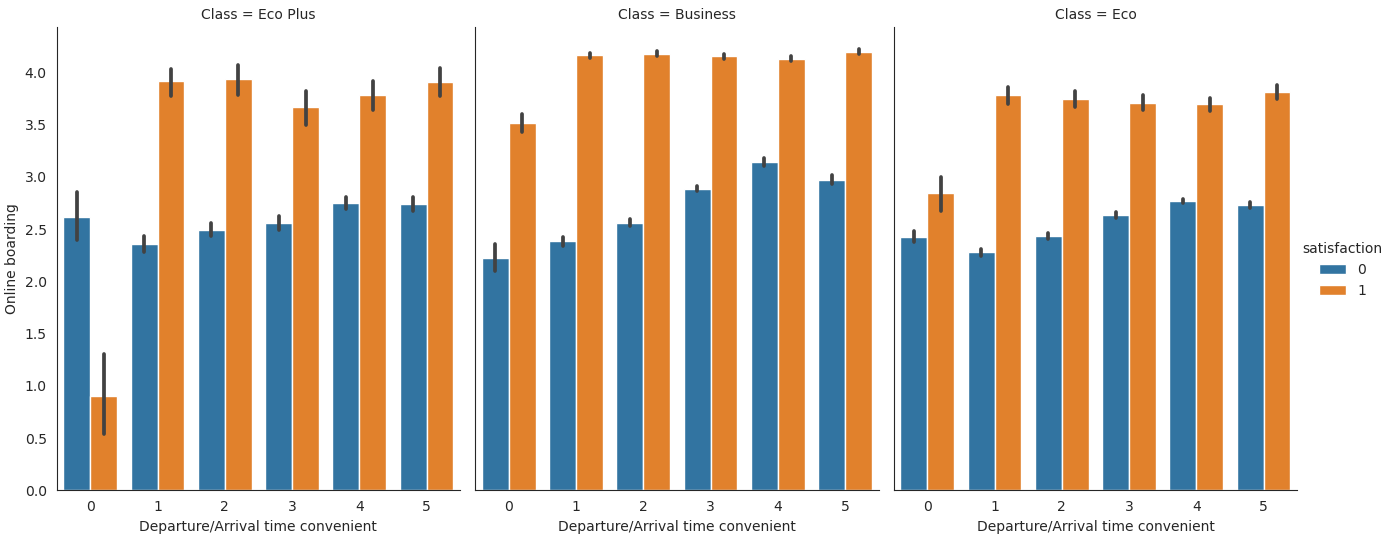

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

Except for the Eco Plus class which has higher number of disssatisfied passengers, where they have provided 0 rating, there seems to be more number of satisfied passengers across classes.

This analysis proves that passengers need convenient features like Online Boarding to make thier flight experience pleasing.

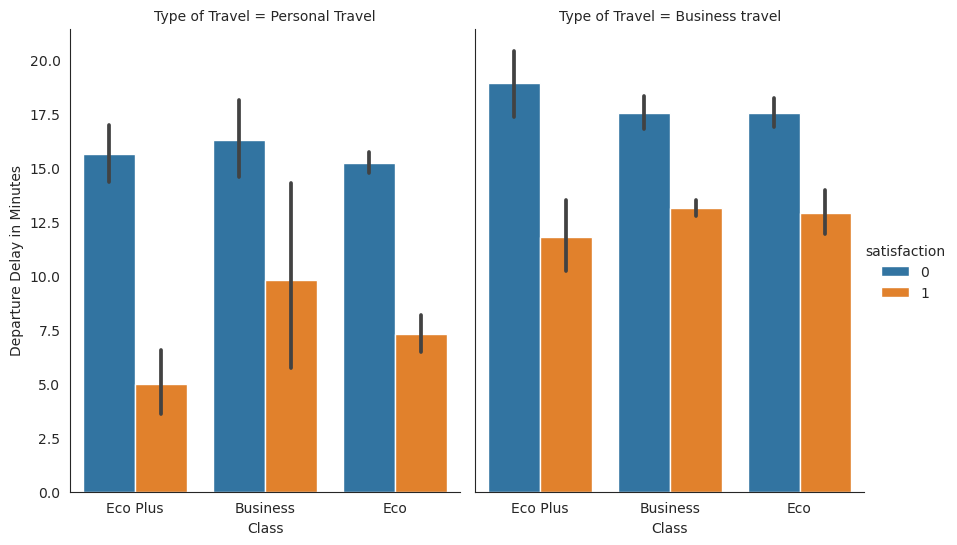

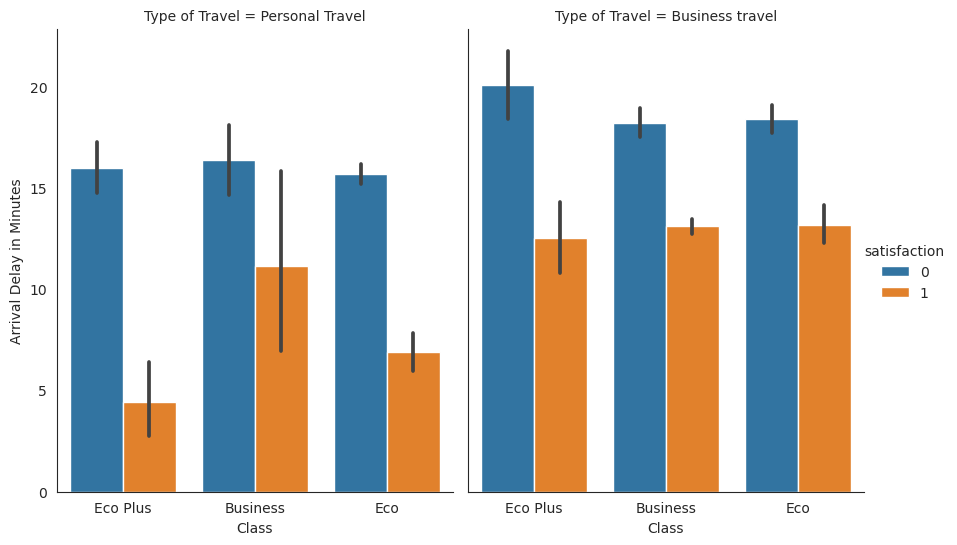

In [21]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)
    
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

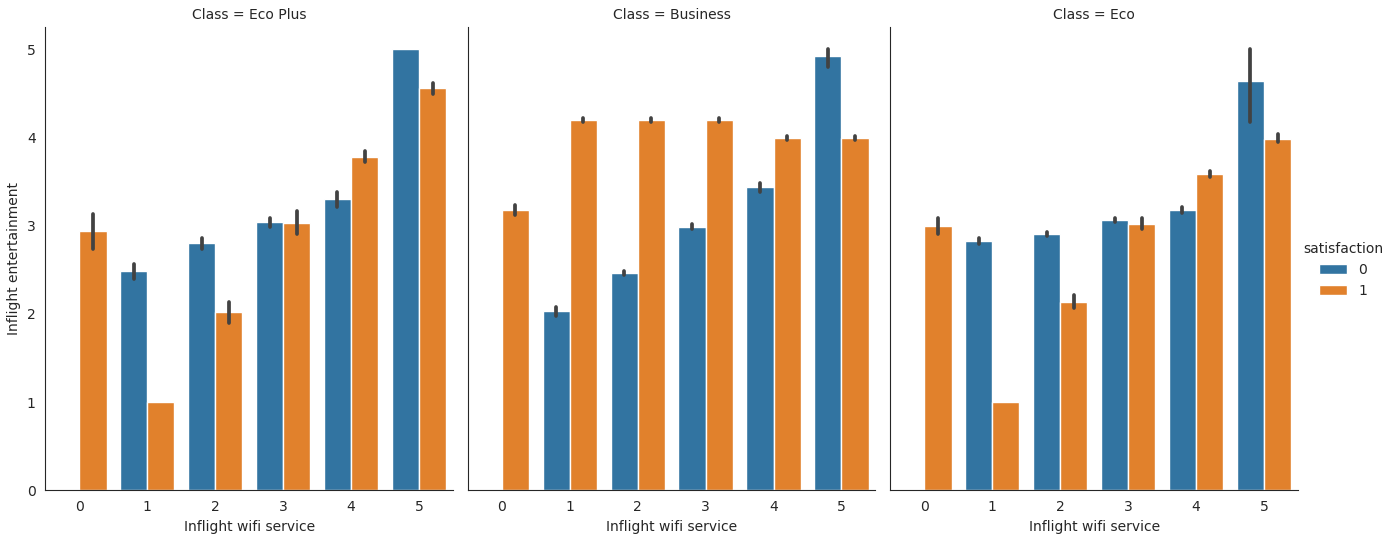

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

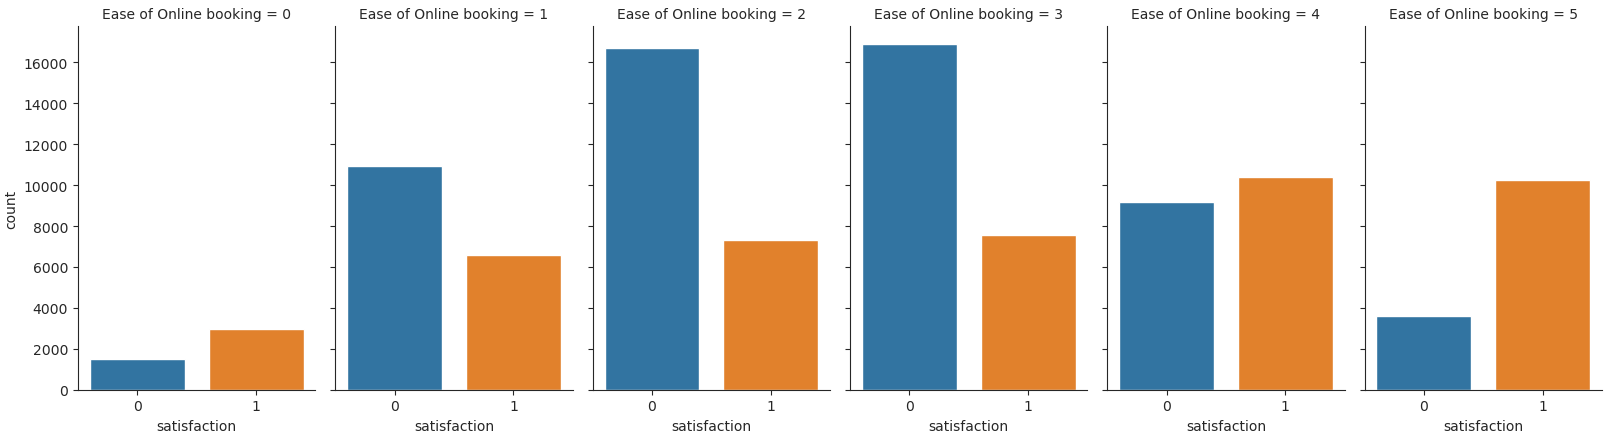

In [23]:
#Graphical Representation for Easy Online Booking

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df_train, kind="count", height=4.5, 
                    aspect=.6)

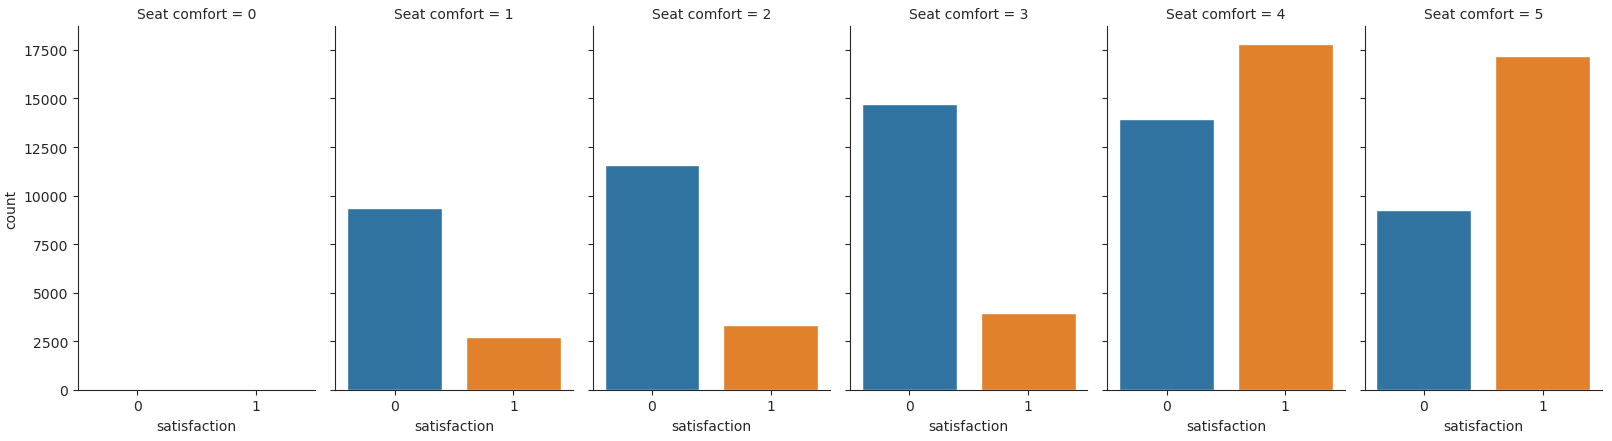

In [24]:
#Graphical Representation for Seat Comfort

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction'>

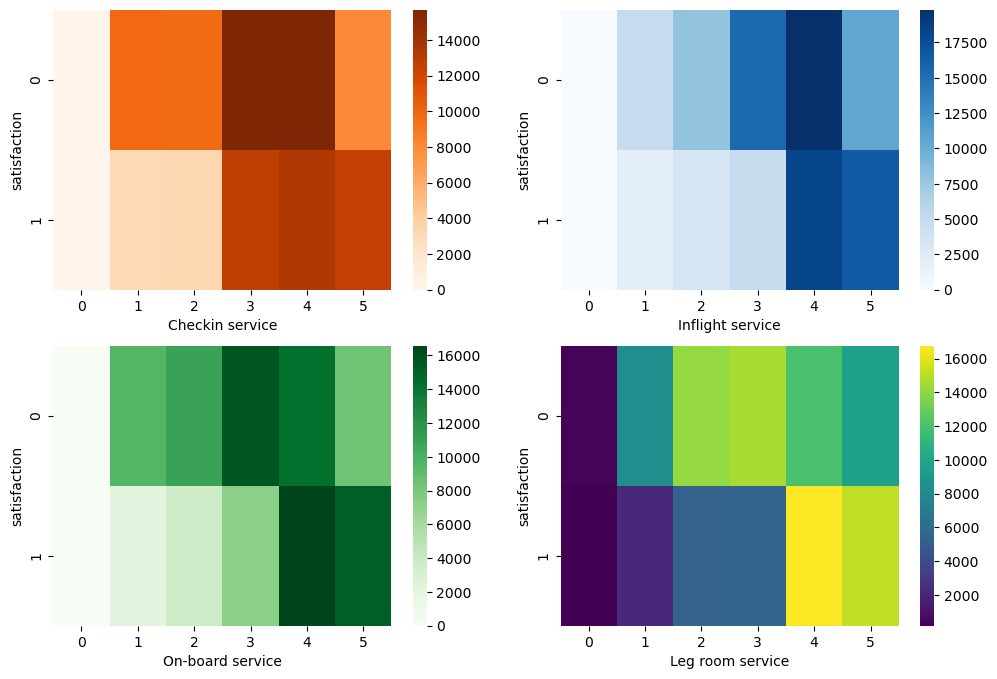

In [25]:
# For Food & Drinks
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df_train['satisfaction'], df_train['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df_train['satisfaction'], df_train['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df_train['satisfaction'], df_train['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df_train['satisfaction'], df_train['Leg room service'])
sns.heatmap(table4, cmap='viridis', ax = axarr[1][1])

In [26]:
# Data Preparation for Train & Test Model Building

from sklearn.preprocessing import LabelEncoder
le_train = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le_train[column] = LabelEncoder()
    df_train[column] = le_train[column].fit_transform(df_train[column])

In [27]:
le_test = {}
for column in df_test.select_dtypes(include=['object']).columns:
    le_test[column] = LabelEncoder()
    df_test[column] = le_test[column].fit_transform(df_test[column])

In [28]:
q1 = df_train.quantile(0.25)

q3 = df_train.quantile(0.75)

inter_q = q3 - q1

print(inter_q)

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                    

In [29]:
# Removing Outliers from the Data and Finding Correlation

df_train = df_train[~((df_train < (q1 - 1.5 * inter_q)) |(df_train > (q3 + 1.5 * inter_q))).any(axis=1)]

df_train.shape

(61197, 23)

<AxesSubplot:>

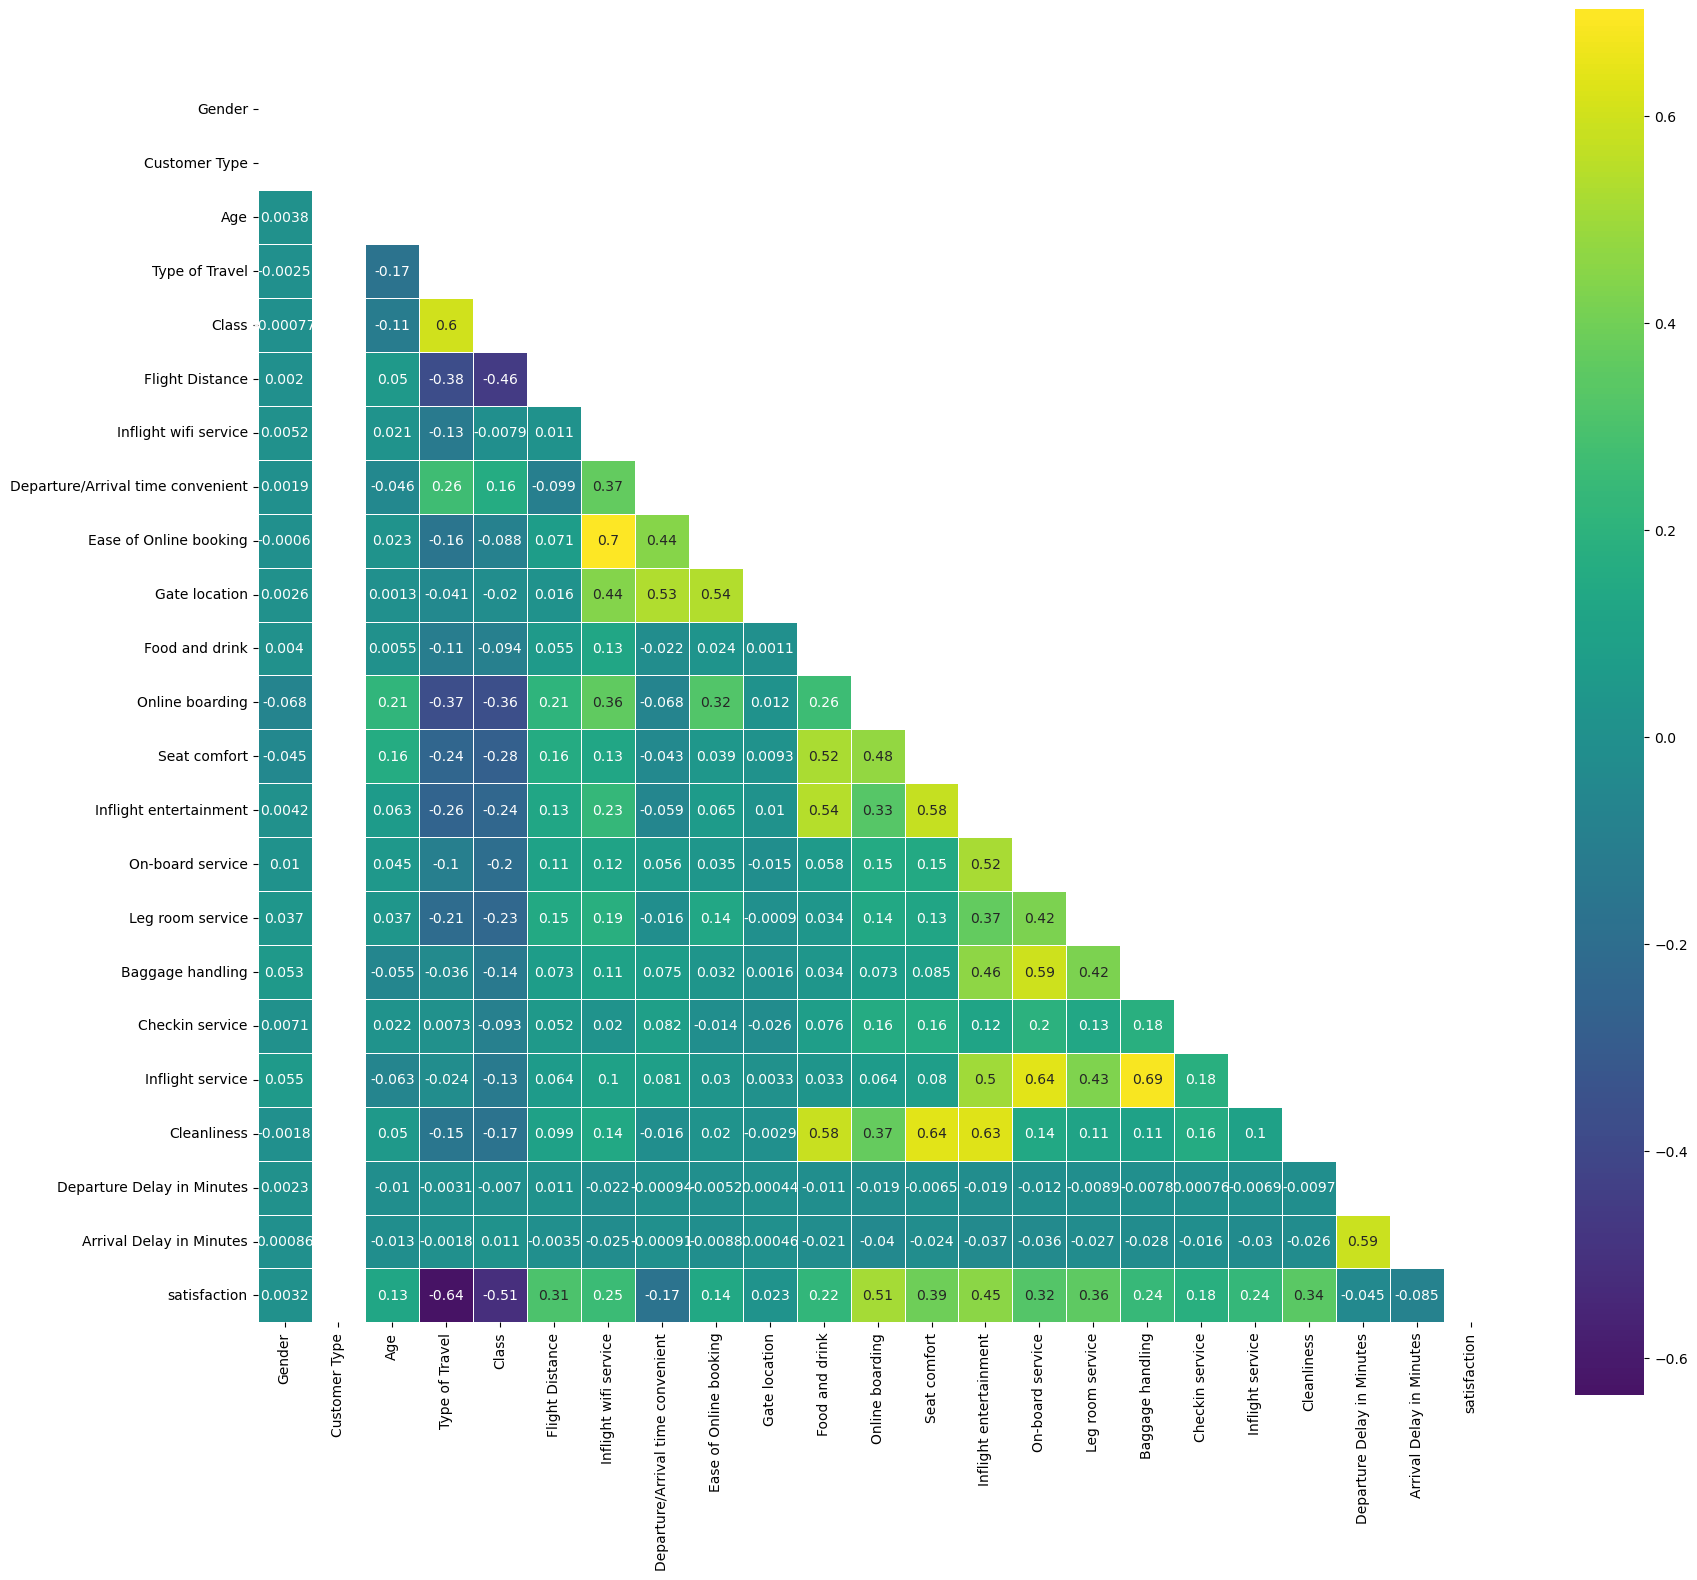

In [30]:
relation = df_train.corr()
m = np.triu(np.ones_like(relation, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(relation, mask=m, cmap='viridis', vmax=None, center=0,square=True, annot=True, linewidths=.5, 
            cbar_kws={"shrink": .9})

In [31]:
from sklearn import preprocessing

mms = preprocessing.MinMaxScaler()
mms.fit(df_train)

df_scaled = pd.DataFrame(mms.transform(df_train), columns=df_train.columns)

df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [32]:
from sklearn.feature_selection import SelectKBest, chi2

X = df_scaled.loc[:,df_scaled.columns!='satisfaction']
y = df_scaled[['satisfaction']]

best = SelectKBest(chi2, k=10)
best.fit(X, y)

X_new = best.transform(X)
print(X.columns[best.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df_train.drop('satisfaction', axis=1)
y = df_train['satisfaction']

best = SelectFromModel(rf(n_estimators=100, random_state=0))
best.fit(X, y)

sup = best.get_support()
feat = X.loc[:,sup].columns.tolist()
print(feat)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']


In [34]:
features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

In [35]:
# Splitting Datasets 
X_train = df_train[features]
y_train = df_train[target].to_numpy()

X_test = df_test[features]
y_test = df_test[target].to_numpy()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [38]:
def classifier(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues', normalize = 'all')
    return model, accuracy

Accuracy = 0.8132891900215584
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



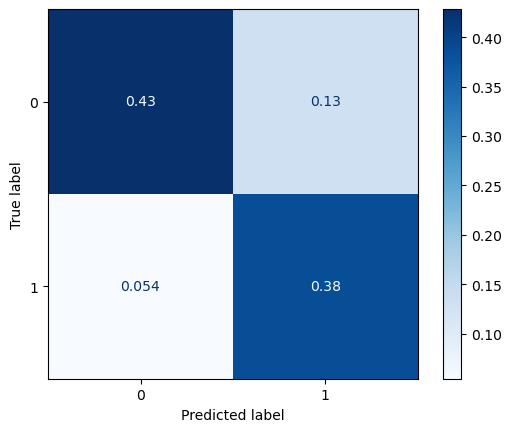

In [39]:
# Algorithm -1 :: Logistic Regression 

from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr = classifier(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8861641515244841
              precision    recall  f1-score   support

           0    0.91421   0.87964   0.89659     14573
           1    0.85327   0.89450   0.87340     11403

    accuracy                        0.88616     25976
   macro avg    0.88374   0.88707   0.88500     25976
weighted avg    0.88746   0.88616   0.88641     25976



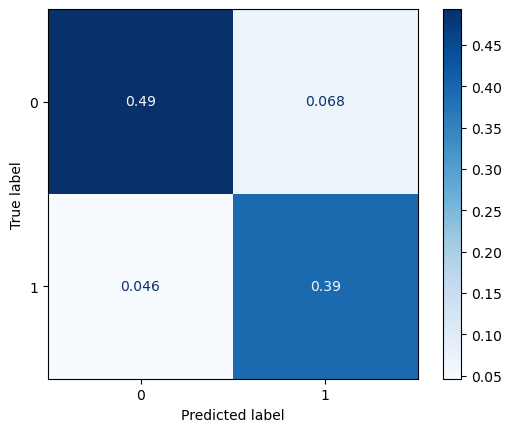

In [40]:
# Algorithm -2 :: K- Nearest Neighbor 

from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn = classifier(model_kn, X_train, y_train, X_test, y_test)

Accuracy = 0.8824684323991376
              precision    recall  f1-score   support

           0    0.93146   0.85329   0.89066     14573
           1    0.83067   0.91976   0.87295     11403

    accuracy                        0.88247     25976
   macro avg    0.88106   0.88652   0.88180     25976
weighted avg    0.88721   0.88247   0.88289     25976



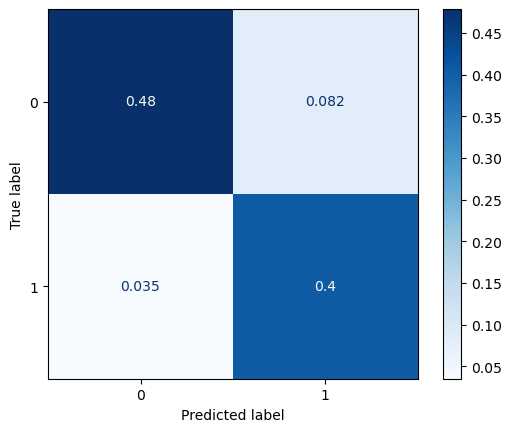

In [41]:
# Algorithm -3 :: Decision Tree

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt = classifier(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8750384970742223
              precision    recall  f1-score   support

           0    0.94916   0.82124   0.88058     14573
           1    0.80512   0.94379   0.86895     11403

    accuracy                        0.87504     25976
   macro avg    0.87714   0.88252   0.87477     25976
weighted avg    0.88593   0.87504   0.87548     25976



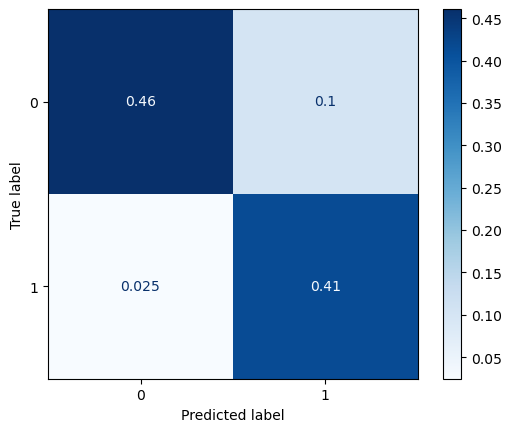

In [42]:
# Algorithm -4 :: Neural Networks
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn = classifier(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.8941330458885125
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



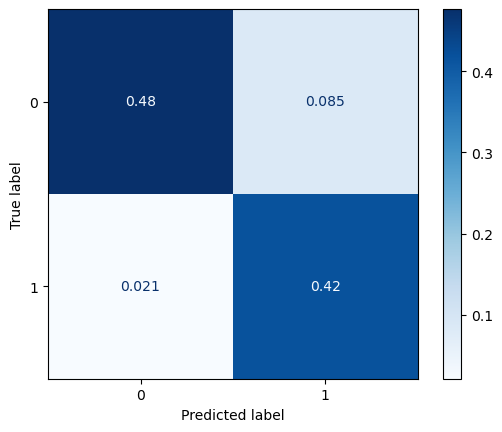

In [43]:
# Algorithm -5 :: Random Forest 
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf = classifier(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8955189405605174
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



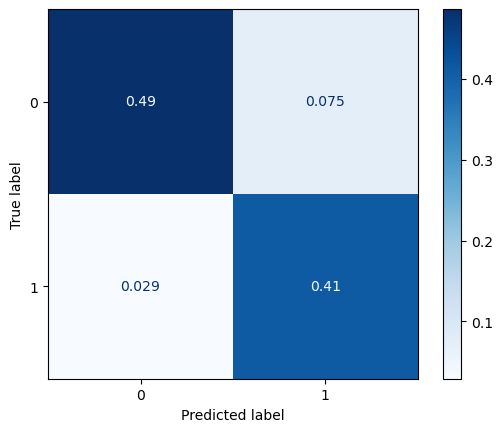

In [44]:
# Algorithm -6 :: AdaBoost
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab = classifier(model_adab, X_train, y_train, X_test, y_test)

In [45]:
accuracies = [accuracy_lr,accuracy_kn,accuracy_dt,accuracy_nn,accuracy_rf,accuracy_adab]

models = {'Model': ['Logistic Regression','K-NN','Decision Tree','Neural Network','Random Forest',
                    'AdaBoost'], 'Accuracy': accuracies}

data = pd.DataFrame(models)

In [46]:
data

,Model,Accuracy
0,Logistic Regression,0.813289
1,K-NN,0.886164
2,Decision Tree,0.882468
3,Neural Network,0.875038
4,Random Forest,0.894133
5,AdaBoost,0.895519


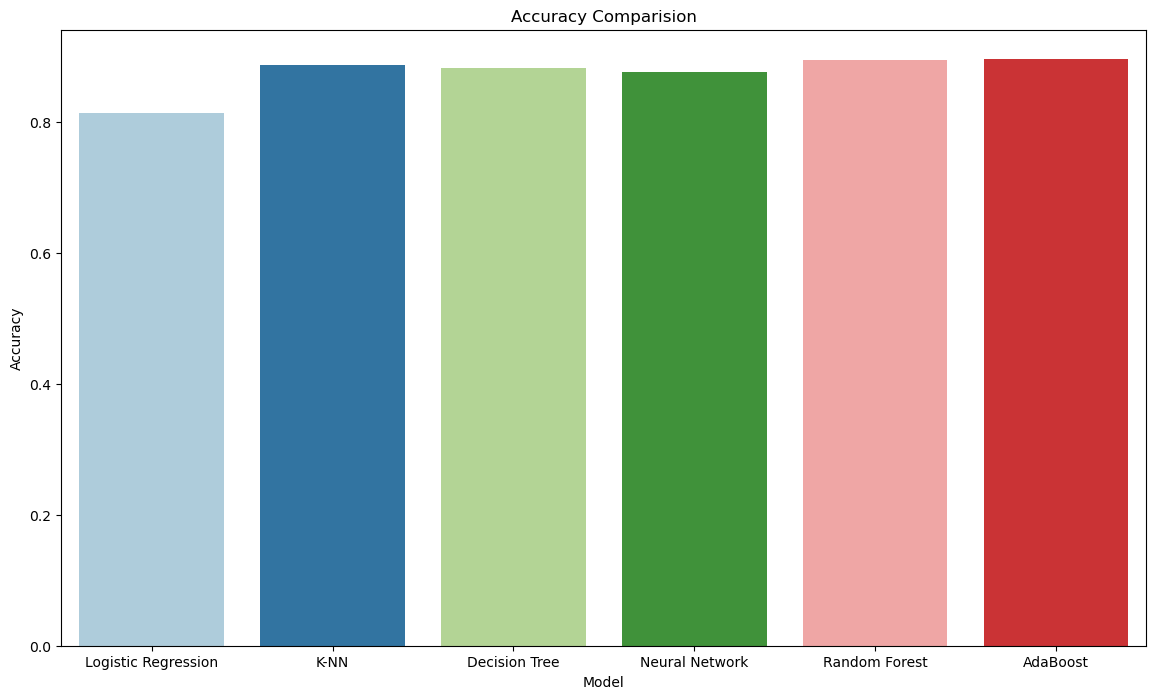

In [47]:
# Graph Representation
ax = plt.subplots(figsize=(14,8))

ax = sns.barplot(x='Model', y='Accuracy', data = data, palette='Paired').set(title="Accuracy Comparision")

From the Graphical Representation of Accuracy Comparision, we can see that AdaBoost has the best accuracy of 89.55%
Followed by the Random Forest which is not so behind with the accuracy of 89.41% and the third best is the K-NN 
with model accuracy of 82%